# House Prices - Feature Engineering

Trying to improve the Root Log Mean squared error result by engineering the features

In [1]:
import os
import platform
import pandas as pd
import numpy as np

# Check which platform is running the notebook
if platform.system() == 'Windows':
    PROJECT_PATH = "\\".join(os.getcwd().split('\\')[:-1])
else:
    # Assuming a Unix based platform
    PROJECT_PATH = "/".join(os.getcwd().split('/')[:-1])

DATA_PATH = os.path.join(PROJECT_PATH, 'data')
TRAIN_DATA_PATH = os.path.join(DATA_PATH, 'train.csv')

# Load the training dataset
house_prices_train = pd.read_csv(TRAIN_DATA_PATH)
house_prices_train = house_prices_train.drop('Id', axis=1)
house_prices_train.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


## Remove Missing values

Remove missing features that are missing 70% of thier total number of records

In [2]:
data_features = house_prices_train.columns
missing_record_threshold = 0.7

# Isolate features that have greater than 70% of their features missing
features_to_remove = []
for feature in data_features:
    feature_data = house_prices_train[house_prices_train[feature].isna()]
    missing_record_count = feature_data.shape[0]
    missing_record_ratio = missing_record_count / house_prices_train.shape[0]
    if missing_record_ratio > missing_record_threshold:
        features_to_remove.append(feature)
        print('{}: {:.2f}%'.format(feature, missing_record_ratio * 100))

Alley: 93.77%
PoolQC: 99.52%
Fence: 80.75%
MiscFeature: 96.30%


In [3]:
# Create a copy of the original data and drop the ones that are missing
training_data_df = house_prices_train.drop(features_to_remove, axis=1)

In [4]:
training_data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 76 columns):
MSSubClass       1460 non-null int64
MSZoning         1460 non-null object
LotFrontage      1201 non-null float64
LotArea          1460 non-null int64
Street           1460 non-null object
LotShape         1460 non-null object
LandContour      1460 non-null object
Utilities        1460 non-null object
LotConfig        1460 non-null object
LandSlope        1460 non-null object
Neighborhood     1460 non-null object
Condition1       1460 non-null object
Condition2       1460 non-null object
BldgType         1460 non-null object
HouseStyle       1460 non-null object
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
RoofStyle        1460 non-null object
RoofMatl         1460 non-null object
Exterior1st      1460 non-null object
Exterior2nd      1460 non-null object
MasVnrType       1452 no

## Impute Missing data

In [5]:
cols = training_data_df.columns

cols_to_impute = []
for c in cols:
    col_data = training_data_df[c]
    missing_data = training_data_df[col_data.isna()]
    if missing_data.shape[0] > 0:
        cols_to_impute.append(c)
        print(c)

LotFrontage
MasVnrType
MasVnrArea
BsmtQual
BsmtCond
BsmtExposure
BsmtFinType1
BsmtFinType2
Electrical
FireplaceQu
GarageType
GarageYrBlt
GarageFinish
GarageQual
GarageCond


In [6]:
missing_data_df = training_data_df[cols_to_impute]
missing_data_df.head()

,LotFrontage,MasVnrType,MasVnrArea,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,Electrical,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageQual,GarageCond
0,65.0,BrkFace,196.0,Gd,TA,No,GLQ,Unf,SBrkr,NaN,Attchd,2003.0,RFn,TA,TA
1,80.0,None,0.0,Gd,TA,Gd,ALQ,Unf,SBrkr,TA,Attchd,1976.0,RFn,TA,TA
2,68.0,BrkFace,162.0,Gd,TA,Mn,GLQ,Unf,SBrkr,TA,Attchd,2001.0,RFn,TA,TA
3,60.0,None,0.0,TA,Gd,No,ALQ,Unf,SBrkr,Gd,Detchd,1998.0,Unf,TA,TA
4,84.0,BrkFace,350.0,Gd,TA,Av,GLQ,Unf,SBrkr,TA,Attchd,2000.0,RFn,TA,TA


### Lot Frontage

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt


sns.distplot(missing_data_df.LotFrontage)
plt.show()

<Figure size 640x480 with 1 Axes>

c:\users\ryan\documents\development\data science\ml-house-prices\env\lib\site-packages\pandas\core\generic.py:6287: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(new_data)


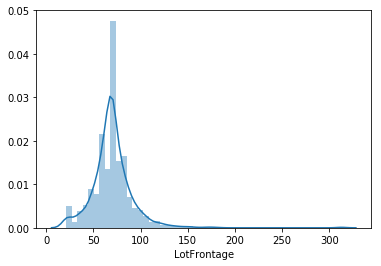

In [8]:
# Impute lot frontage with the median
median = missing_data_df.LotFrontage.median()
missing_data_df.LotFrontage.fillna(median, inplace=True)

sns.distplot(missing_data_df.LotFrontage)
plt.show()

### MasVnrType

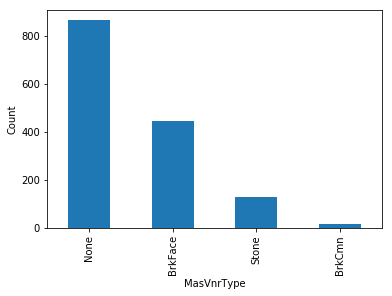

In [9]:
ax = missing_data_df.MasVnrType.value_counts().plot(kind='bar')
ax.set_xlabel('MasVnrType')
ax.set_ylabel('Count')
plt.show()

In [10]:
missing_data_df.MasVnrType.isna().value_counts()

False    1452
True        8
Name: MasVnrType, dtype: int64

For `MasVnrType`, the best result to fill in the missing data is to provide the value `None` since we don't have any insight into what this house would be.

In [11]:
missing_data_df.MasVnrType.fillna('None', inplace=True)

### MasVnrArea

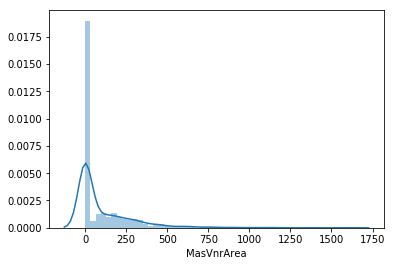

In [12]:
sns.distplot(missing_data_df.MasVnrArea)
plt.show()

In [13]:
missing_data_df.MasVnrArea.isna().value_counts()

False    1452
True        8
Name: MasVnrArea, dtype: int64

There seems to be a lot of zeros for `MasVnrArea`. The best result to fill in this missing value will be 0 as median in this case wouldn't truely represent the actual value against the other records.

In [14]:
missing_data_df.MasVnrArea.fillna(0, inplace=True)

### BsmtQual

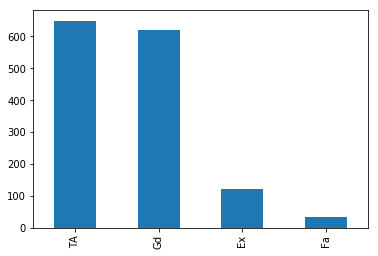

In [15]:
missing_data_df.BsmtQual.value_counts().plot(kind='bar')

In [16]:
missing_data_df.BsmtQual.isna().value_counts()

False    1423
True       37
Name: BsmtQual, dtype: int64

Since there are very few missing results for this feature. I will go with choosing the most frequent category to impute `BsmtQual`. Considering that the majoirty of them are TA or Gd, it is likely to be either one of these.

In [17]:
# Extract the most frequent feature
most_frequent = missing_data_df.BsmtQual.value_counts().sort_values()[::-1].index.tolist()[0]
missing_data_df.BsmtQual.fillna(most_frequent, inplace=True)

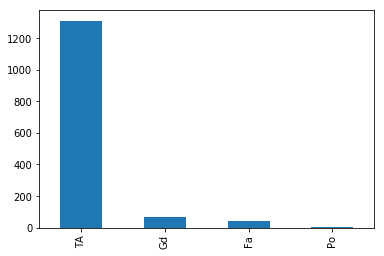

In [18]:
missing_data_df.BsmtCond.value_counts().plot(kind='bar')
plt.show()

As most of the records for this feature are `TA`, I will impute it will that value

In [19]:
most_frequent = missing_data_df.BsmtCond.value_counts().sort_values()[::-1].index.tolist()[0]
missing_data_df.BsmtCond.fillna(most_frequent, inplace=True)

### Remaining categorical features

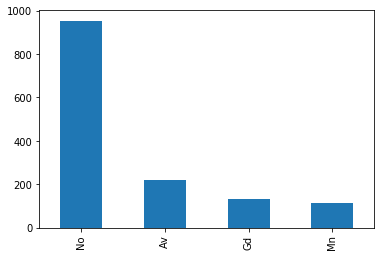

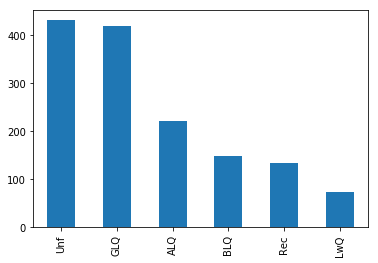

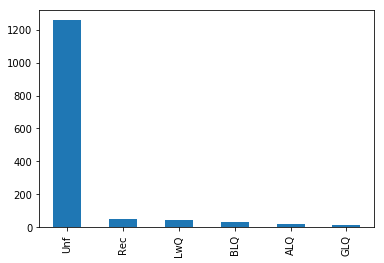

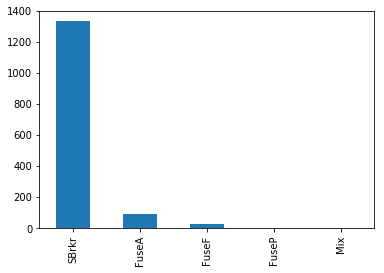

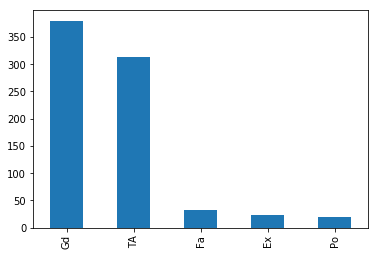

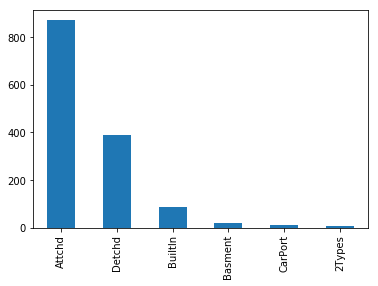

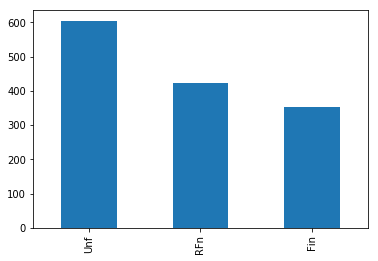

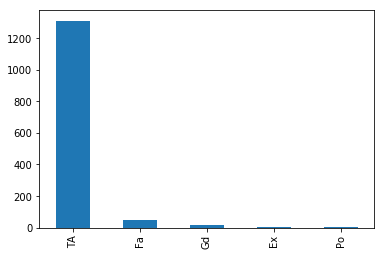

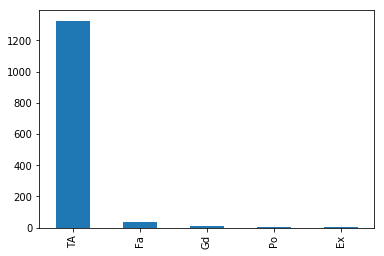

In [20]:
features = [
    'BsmtExposure',
    'BsmtFinType1',
    'BsmtFinType2',
    'Electrical',
    'FireplaceQu',
    'GarageType',
    'GarageFinish',
    'GarageQual',
    'GarageCond',
]

for c in features:
    cold_data = missing_data_df[c]
    cold_data.value_counts().plot(kind='bar')
    plt.show()

For the missing categorical values, I will impute them with the most frequent value. In most cases there is a clear dominant category.

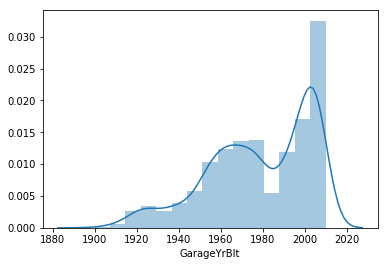

In [21]:
sns.distplot(missing_data_df.GarageYrBlt)
plt.show()

In [22]:
most_frequent = missing_data_df.GarageYrBlt.value_counts().index.tolist()[0]
missing_data_df.GarageYrBlt.fillna(most_frequent, inplace=True)

For the GarageYrBlt feature, take the most frequent date since the median would not really reflect the true value.

## Numeric Cols

In [109]:
numeric_data = training_data_df.select_dtypes(['float64', 'int64'])

# Check that a numeric feature doesn't all have the same value
non_unique_cols = []
for c in numeric_data.columns:
    col_data = training_data_df[c]
    unique_values = col_data.nunique()
    if unique_values == 0:
        non_unique_cols.append(c)
        
non_unique_cols

[]

## Experiments with Sklearn

In [68]:
numeric_features = training_data_df.select_dtypes(['float64', 'int64']).columns.tolist()
categorical_features = training_data_df.select_dtypes(['object']).columns.tolist()

In [70]:
from sklearn.pipeline import Pipeline, FeatureUnion
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import FunctionTransformer

numeric_pipeline = Pipeline([
    ('cols', ColumnTransformer([
        ('impute', SimpleImputer(strategy='median'), numeric_features)
    ])),
    ('scale', FunctionTransformer(np.log1p))
])

categorical_pipeline = Pipeline([
    ('cols', ColumnTransformer([
        ('impute', SimpleImputer(strategy='most_frequent'), categorical_features)
    ])),
    ('one_hot', OneHotEncoder(handle_unknown='ignore'))
])

precessing_pipeline = FeatureUnion([
    ('numeric', numeric_pipeline),
    ('categorical', categorical_pipeline)
])

In [81]:
from sklearn.base import TransformerMixin

class ToArray(TransformerMixin):
    def fit(self, X, y=None):
        return self
    
    def transform(self, X):
        return X.toarray()

In [83]:
from sklearn.decomposition import PCA

pca_pipeline = Pipeline([
    ('process', precessing_pipeline),
    ('array', ToArray()),
    ('pca', PCA(n_components=0.99, random_state=42))
])

In [104]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.feature_selection import SelectKBest, f_regression

ml_pipeline = Pipeline([
    ('pca', pca_pipeline),
    ('k_best', SelectKBest(score_func=f_regression, k=20)),
    ('ml', RandomForestRegressor(random_state=42, n_estimators=200))
])

In [105]:
y = training_data_df['SalePrice']

ml_pipeline = ml_pipeline.fit(training_data_df, y)

In [106]:
from sklearn.metrics import mean_squared_log_error, mean_squared_error

y_pred = ml_pipeline.predict(training_data_df)

lse = mean_squared_log_error(y, y_pred)
rmsle = np.sqrt(lse)

rmse = np.sqrt(mean_squared_error(y, y_pred))
print(rmse, rmsle)

14843.151024867404 0.07768810723672083
